[![Buy Me A Coffee](https://img.shields.io/badge/Buy%20Me%20A%20Coffee-support%20my%20work-FFDD00?style=flat&labelColor=101010&logo=buy-me-a-coffee&logoColor=white)](https://www.buymeacoffee.com/r0mymendez)

---

# 🔄 **License Notice**

This notebook is based on the official [Google tutorial](https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb) **"quick_start_with_hugging_face"**, released under the [Apache 2.0 License](https://www.apache.org/licenses/LICENSE-2.0).


`Copyright 2025 Google LLC.`
`Licensed under the Apache License, Version 2.0.`

<br>

----
<br>


# 💎 What is Gemma?
Gemma is a family of open language models developed by Google DeepMind and other Google teams. Built on the same underlying technology as the Gemini models, Gemma models offer free access to their weights. While categorized as "open models," their terms of use, redistribution rights, and ownership vary by version and may not conform to standard open-source licenses.

![gemma](img/gemma.png)

The Gemma family includes variants tailored to different use cases, such as code generation, multimodal processing (text and images), structured data reasoning, and content classification. MedGemma is a specialized variant optimized for medical applications, with the ability to interpret clinical text and medical images such as mammograms. Other models, such as ShieldGemma 2, focus on detecting harmful content, while DataGemma integrates real-world statistical data through retrieval techniques to improve factual accuracy and reduce hallucinations in model outputs.

<br>

----

<br>

# ❤️ MedGemma

**MedGemma** is a collection of **Gemma 3** variants that are trained for performance on medical text and image comprehension. Developers can use MedGemma to accelerate building healthcare-based AI applications. MedGemma comes in two variants: a 4B multimodal version and a 27B text-only version.

<br>

----

<br>

## ❤️ MedGemma: Use cases

This open-source model enables a wide range of potential applications that can be explored and developed. Below is a list of possible use cases where MedGemma can be applied:


![MedGemma](img/medgemma_usecase.png)

1. **AI-assisted detection in medical imaging**
Support for early identification of clinical findings in mammograms, X-rays, CT scans, or ultrasounds through visual pattern analysis.

2. **Summarization of medical reports with attached images**
Ability to generate automatic summaries from clinical reports that include image references, improving efficiency in medical documentation.

3. **Virtual assistant for diagnostic interpretation**
Real-time support for healthcare professionals in interpreting findings from medical images and linking them to patient history or reported symptoms.

4. **Synthetic data generation for medical training**
Generation of simulated clinical text from image inputs, useful for medical education or testing diagnostic tools.

5. **Image-text consistency verification**
Automatic validation of whether the written report accurately reflects the visual content of the associated medical image.

<br>

---
<br>

## 🩻 Tutorial
Below you can see an example of the kind of output you can generate by running this model.

This tutorial is based on the official notebook provided by Google Health, which you can find here: 🔗 [Colab – MedGemma Quick Start with Hugging Face](https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb)

The following image was taken from a public dataset on Kaggle:  **Bone Fracture Detection: Computer Vision Project**🔗 [View dataset](https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project/data)

🩻 **Image used**`fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.8b022b79c884d0b37d923a3c961591c6.jpg`


<br>

---

<br>

### 🤗 Setting up Hugging Face: Secret Keys
To use Hugging Face-hosted models, you will need to provide a read access token. You can generate one from your Hugging Face account settings.

1. Open the Colab notebook and locate the 🔑 Secrets section on the left sidebar.
2. Click “+” to add a new secret and name it `HF_TOKEN`.
3. Paste your access token in the Value field.

![secrets](img/google_colab_secrets.png)


In [1]:
import os
import sys
from google.colab import userdata
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

# Set Hugging Face token from Colab Secrets
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")


In [2]:
### Install dependencies
! pip install --upgrade --quiet accelerate bitsandbytes transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"
model_id = f"google/medgemma-{model_variant}"
use_quantization = True
is_thinking = False

model_kwargs = dict(
    device_map="auto",
    quantization_config = BitsAndBytesConfig(load_in_4bit=True)
)

# output: Inference the model
from transformers import pipeline
pipe = pipeline("image-text-to-text", model=model_id, model_kwargs=model_kwargs)
pipe.model.generation_config.do_sample = False


config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0


---

**[ User ]**

Describe this radiography pic

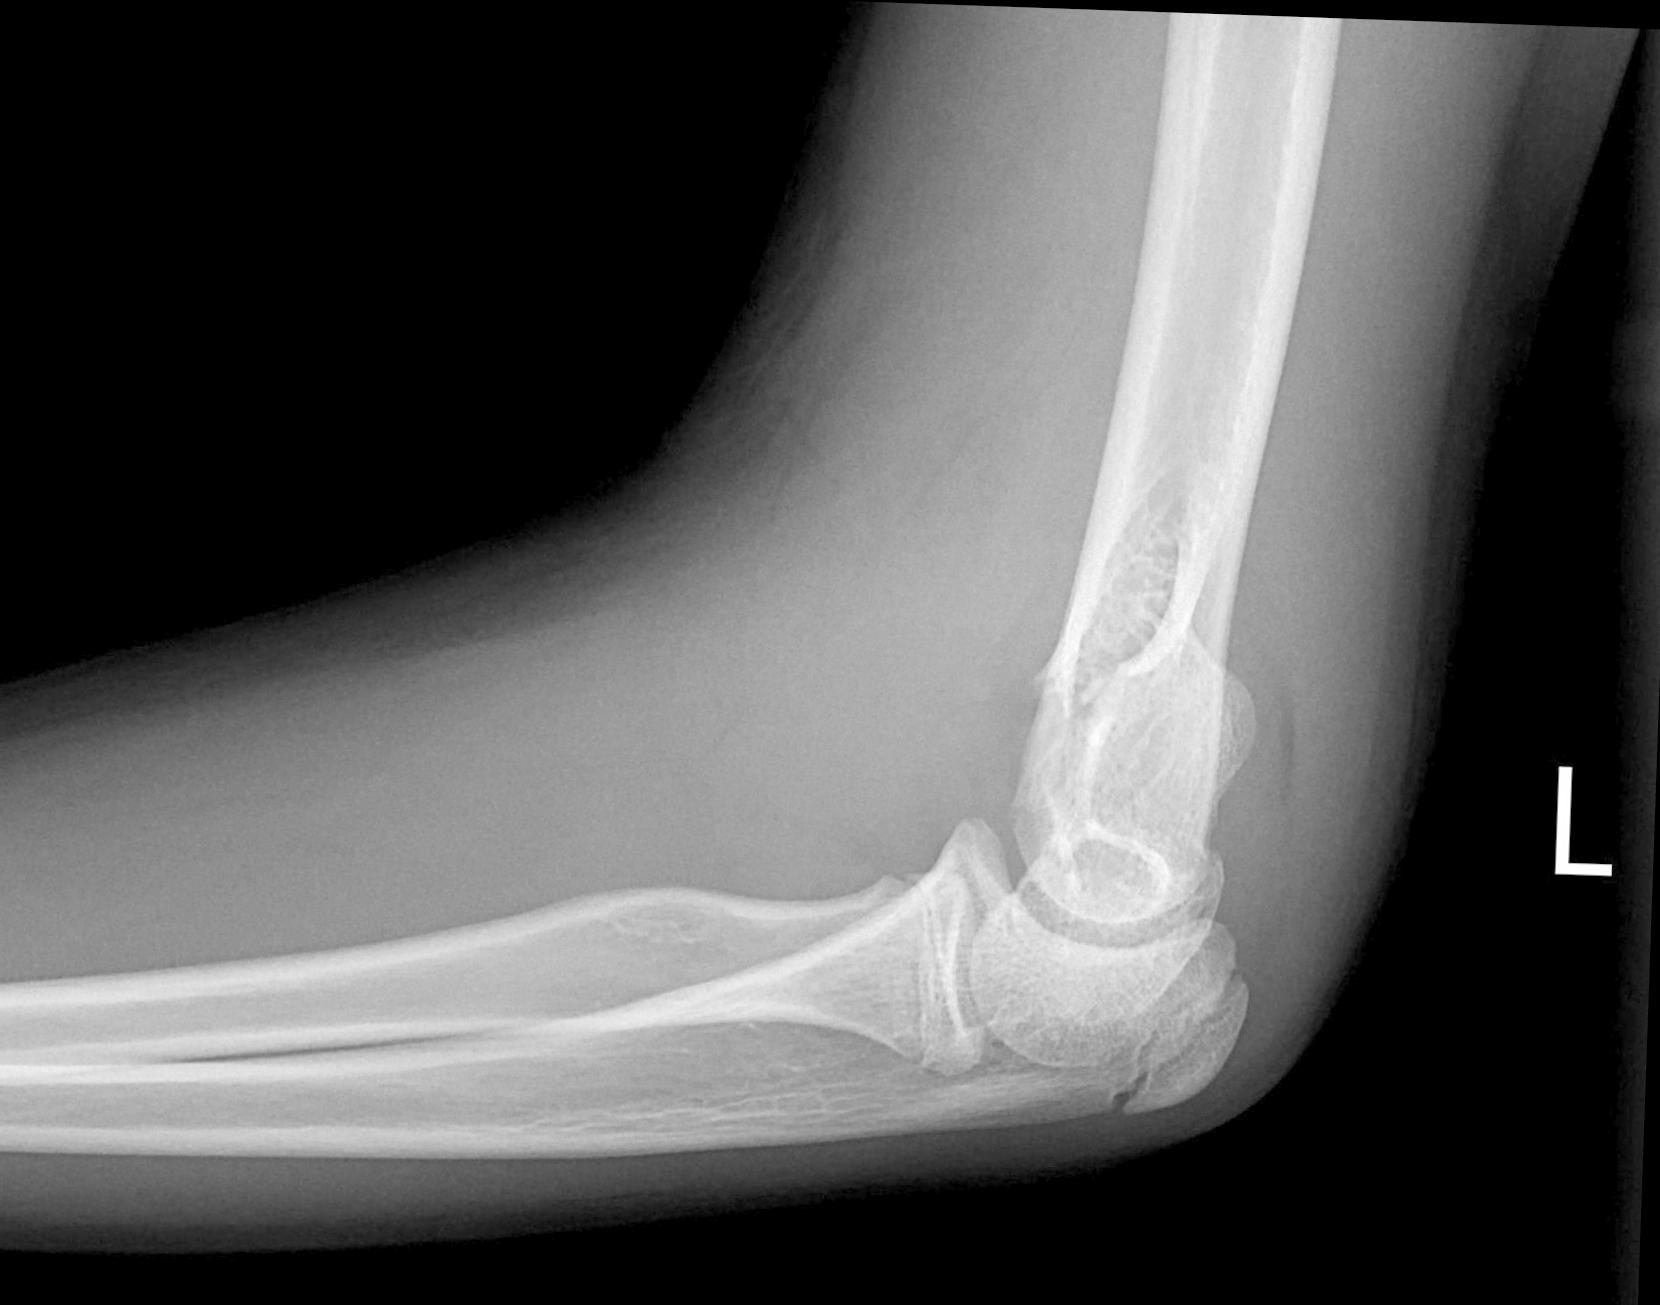

---

**[ MedGemma ]**

Based on the provided radiograph, the following observations can be made:

*   **Anatomy:** The image depicts a lateral view of the left humerus. The bony structures of the humerus, including the humeral head, greater and lesser tubercles, and the shaft of the humerus, are visible. The joint spaces are also apparent.

*   **Findings:** There is a radiopaque lesion within the humeral shaft, which could represent a bone lesion. Further evaluation is needed to determine the nature of the lesion.

*   **Impression:** The radiograph shows a lesion within the humeral shaft. Further imaging, such as MRI or CT, is recommended to characterize the lesion and determine its etiology.

**Disclaimer:** This interpretation is based solely on the provided radiograph and is not a definitive diagnosis. A complete evaluation requires clinical history, physical examination, and potentially additional imaging studies.


---

In [6]:
# image
prompt = "Describe this radiography pic"
image_url="/content/fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.8b022b79c884d0b37d923a3c961591c6.jpg"
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)


# **Format conversation**
role_instruction = """You are a board-certified radiologist specialized.
Respond using appropriate clinical terminology."""
system_instruction = role_instruction
max_new_tokens = 300

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]


output = pipe(text=messages, max_new_tokens=max_new_tokens)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))